In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('apt_data_test.csv')

In [3]:
df.head()

,id,amount,latitude,longitude,stratum,bathrooms,m2Terrain,bedrooms,garage
0,192016777,770000000,6.245293,-75.595479,5.0,3.0,117.0,3.0,1.0
1,192190289,619500000,6.230184,-75.590876,4.0,3.0,144.0,3.0,1.0
2,192211904,750000000,6.238153,-75.592649,5.0,2.0,100.0,3.0,1.0
3,192249161,763000000,6.216125,-75.608404,5.0,2.0,87.0,2.0,2.0
4,192325734,2880000000,6.184818,-75.557794,6.0,5.0,280.0,4.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1035 non-null   int64  
 1   amount     1035 non-null   int64  
 2   latitude   1035 non-null   float64
 3   longitude  1035 non-null   float64
 4   stratum    984 non-null    float64
 5   bathrooms  1032 non-null   float64
 6   m2Terrain  1035 non-null   float64
 7   bedrooms   1031 non-null   float64
 8   garage     845 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 72.9 KB


## Exploratory data analysis

Checking the graphs for every column looking for outliers or data inconsistencies

### Filtering m2Terrain variable

Since we are looking to build a model for calculating **apartments** pricing in Medellin, we need to filter the data to prevent including large properties in our model

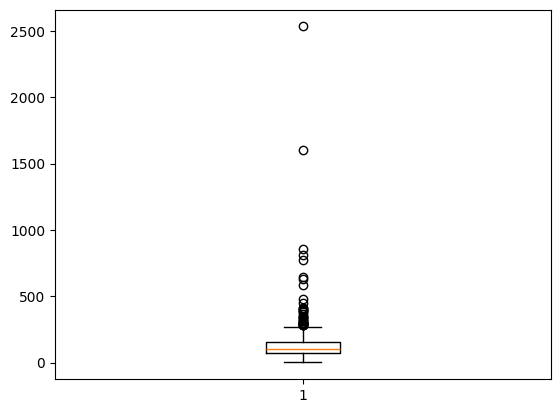

In [5]:
plt.boxplot(df['m2Terrain'])
plt.show()

In [6]:
# Filter the dataframe to keep only rows where m2Terrain is <= 200
df = df[df['m2Terrain'] <= 200]

# Reset index if needed (optional)
df = df.reset_index(drop=True)

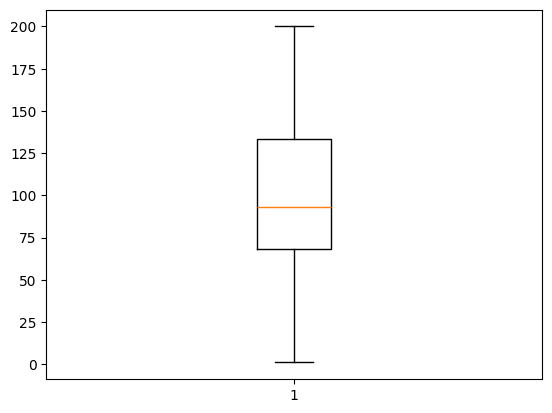

In [7]:
plt.boxplot(df['m2Terrain'])
plt.show()

### Exploring garage, bathrooms and bedrooms variables

Here I checked the distribution of these variables, as I mentioned before, since I'm focusing on **apartments** in Medellin, it is unlikely that apartments have more than 4 garages, that's why you see (later in the code) that I dropped those rows with the objective of maintaining a clean and focused dataset.

In [8]:
# Replace nulls in 'garage' with 0
df['garage'] = df['garage'].fillna(0)

# Clean null values for bathrooms using median
bth_mean = df['bathrooms'].median()
df['bathrooms'] = df['bathrooms'].fillna(bth_mean)

# Clean null values for bedrooms using median
bedrms_mean = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(bedrms_mean)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         916 non-null    int64  
 1   amount     916 non-null    int64  
 2   latitude   916 non-null    float64
 3   longitude  916 non-null    float64
 4   stratum    873 non-null    float64
 5   bathrooms  916 non-null    float64
 6   m2Terrain  916 non-null    float64
 7   bedrooms   916 non-null    float64
 8   garage     916 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 64.5 KB


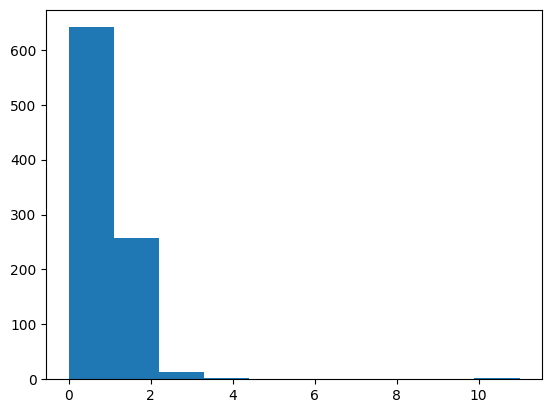

In [9]:
plt.hist(df['garage'])
plt.show()

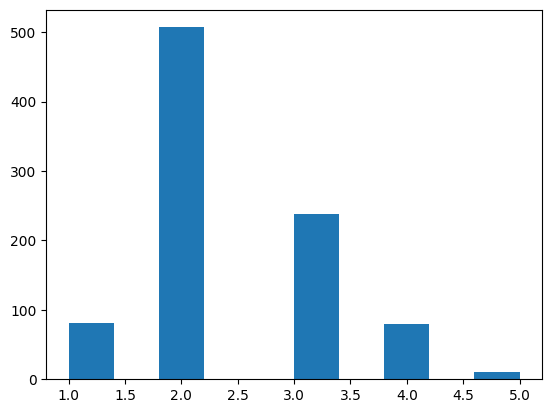

In [10]:
plt.hist(df['bathrooms'])
plt.show()

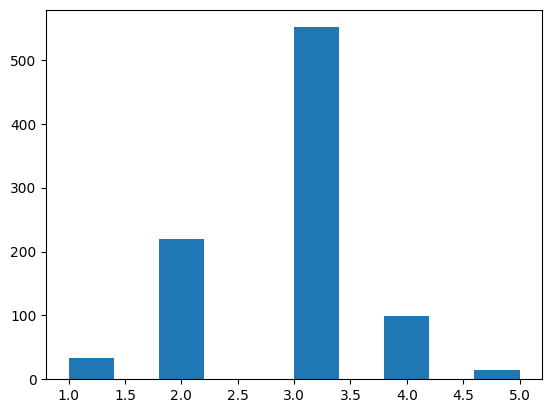

In [11]:
plt.hist(df['bedrooms'])
plt.show()

In [12]:
# Get unique values for bathrooms column
df['bathrooms'].unique()

array([3., 2., 1., 4., 5.])

In [13]:
# Get unique values for garage column
df['garage'].unique()

array([ 1.,  2.,  0.,  3.,  4., 11.])

In [14]:
# Get unique values for bedrooms column
df['bedrooms'].unique()

array([3., 2., 4., 1., 5.])

In [15]:
# Select rows where garage > 3
high_garage_numb_rows = df[df['garage'] > 3]

# Display these rows
high_garage_numb_rows

,id,amount,latitude,longitude,stratum,bathrooms,m2Terrain,bedrooms,garage
301,192277390,915000000,6.213897,-75.570645,6.0,3.0,162.00,4.0,4.0
802,191833471,125000000,6.284222,-75.614040,1.0,1.0,45.95,2.0,11.0
831,191555232,470000000,6.265273,-75.601380,5.0,3.0,100.00,5.0,11.0
845,191442614,1250000000,6.192461,-75.577316,6.0,4.0,140.00,3.0,4.0


In [16]:
# Select rows where bathrooms > 4
high_bathrooms_numb_rows = df[df['bathrooms'] > 4]

# Display these rows
high_bathrooms_numb_rows

,id,amount,latitude,longitude,stratum,bathrooms,m2Terrain,bedrooms,garage
46,192325341,980000000,6.247342,-75.601171,5.0,5.0,197.0,3.0,1.0
104,192215258,1160000000,6.179480,-75.570608,5.0,5.0,157.0,3.0,2.0
441,191985187,1600000000,6.189042,-75.579044,6.0,5.0,197.0,3.0,3.0
463,192335710,1350000000,6.234852,-75.590254,5.0,5.0,140.0,3.0,2.0
510,10333650,630000000,6.228671,-75.606058,4.0,5.0,120.0,5.0,1.0
645,192285497,1400000000,6.247638,-75.565815,6.0,5.0,195.0,3.0,2.0
650,192261520,1400000000,6.180847,-75.569834,6.0,5.0,200.0,4.0,2.0
818,7210733,800000000,6.181582,-75.564072,6.0,5.0,172.0,3.0,2.0
838,191396210,1500000000,6.216714,-75.560059,6.0,5.0,190.0,3.0,2.0
843,6892779,660000000,6.212234,-75.564651,6.0,5.0,134.0,4.0,1.0


In [17]:
# Filter the dataframe to keep only rows where garage is <= 4
df = df[df['garage'] <= 4]

# Reset index
df = df.reset_index(drop=True)

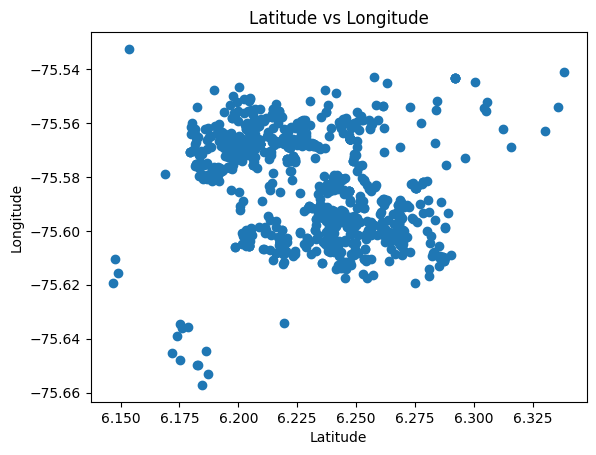

In [18]:
# Check latitude and longitude distribution
plt.scatter(df['latitude'], df['longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         914 non-null    int64  
 1   amount     914 non-null    int64  
 2   latitude   914 non-null    float64
 3   longitude  914 non-null    float64
 4   stratum    871 non-null    float64
 5   bathrooms  914 non-null    float64
 6   m2Terrain  914 non-null    float64
 7   bedrooms   914 non-null    float64
 8   garage     914 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 64.4 KB


## Final data check

In [20]:
# Fit datatypes for memory usage optimization
df['stratum']=df['stratum'].astype('category')
df['m2Terrain']=df['m2Terrain'].astype('float16')
df['garage']=df['garage'].astype('int8')
df['bathrooms']=df['bathrooms'].astype('int8')
df['bedrooms']=df['bedrooms'].astype('int8')

In [21]:
#Check datatypes after optimization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         914 non-null    int64   
 1   amount     914 non-null    int64   
 2   latitude   914 non-null    float64 
 3   longitude  914 non-null    float64 
 4   stratum    871 non-null    category
 5   bathrooms  914 non-null    int8    
 6   m2Terrain  914 non-null    float16 
 7   bedrooms   914 non-null    int8    
 8   garage     914 non-null    int8    
dtypes: category(1), float16(1), float64(2), int64(2), int8(3)
memory usage: 34.3 KB


In [22]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,amount,latitude,longitude,stratum,bathrooms,m2Terrain,bedrooms,garage
0,192016777,770000000,6.245293,-75.595479,5.0,3,117.0,3,1
1,192190289,619500000,6.230184,-75.590876,4.0,3,144.0,3,1
2,192211904,750000000,6.238153,-75.592649,5.0,2,100.0,3,1
3,192249161,763000000,6.216125,-75.608404,5.0,2,87.0,2,2
4,192356378,660000000,6.219651,-75.566952,NaN,2,90.0,3,1


In [23]:
# Create final dataset dropping id column before exporting
cleanData = df.drop("id",axis=1)

In [24]:
# Checking data
cleanData.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,amount,latitude,longitude,stratum,bathrooms,m2Terrain,bedrooms,garage
0,770000000,6.245293,-75.595479,5.0,3,117.0,3,1
1,619500000,6.230184,-75.590876,4.0,3,144.0,3,1
2,750000000,6.238153,-75.592649,5.0,2,100.0,3,1
3,763000000,6.216125,-75.608404,5.0,2,87.0,2,2
4,660000000,6.219651,-75.566952,NaN,2,90.0,3,1


In [25]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   amount     914 non-null    int64   
 1   latitude   914 non-null    float64 
 2   longitude  914 non-null    float64 
 3   stratum    871 non-null    category
 4   bathrooms  914 non-null    int8    
 5   m2Terrain  914 non-null    float16 
 6   bedrooms   914 non-null    int8    
 7   garage     914 non-null    int8    
dtypes: category(1), float16(1), float64(2), int64(1), int8(3)
memory usage: 27.1 KB


In [26]:
# Exporting dataframe to CSV
cleanData.to_csv("./data/apt_eda_clean_data.csv", encoding='utf-8', index=False)